In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/judge-1377884607_tweet_product_company.csv",
                       encoding='unicode_escape')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [4]:
# Create a working dataframe with easier column name
data.drop_duplicates(subset=['tweet_text'], inplace=True)
data.dropna(subset=['tweet_text'], inplace=True)
data.rename(columns = {'emotion_in_tweet_is_directed_at':'brand_item', 'is_there_an_emotion_directed_at_a_brand_or_product':'emotion'}, inplace=True)

# Convert the data types to string
data['tweet_text'] = data['tweet_text'].astype(str)
data['brand_item'] = data['brand_item'].astype(str)



In [5]:
data['brand_item'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'nan', 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [6]:
# Brand name mapping
brand = {'iPhone': 'apple',
         'iPad or iPhone App':'apple',
         'iPad': 'apple',
         'Google': 'google',
         'nan': 'UNK',
         'Android':'google',
         'Apple': 'apple',
         'Android App':'google',
         'Other Google product or service':'google',
         'Other Apple product or service':'apple'
        }

data['brand_name'] = data['brand_item'].map(brand)

# Encoding class label to brief
label_encoder = {'Negative emotion': 'negative',
                 'Positive emotion': 'positive',
                 'No emotion toward brand or product': 'neutral',
                 "I can't tell":'no idea'}

data['emotion'] = data['emotion'].map(label_encoder)


In [7]:
data.head()

,tweet_text,brand_item,emotion,brand_name
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative,apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,positive,apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,positive,apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative,apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,positive,google


<ipython-input-8-988f46945e5f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion',


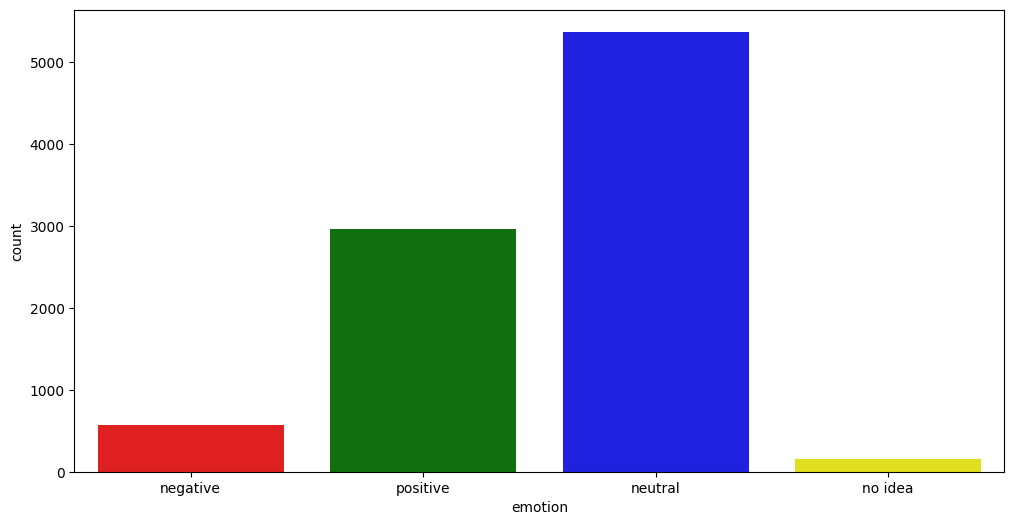

In [8]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='emotion',
              data=data,
              palette=['red', 'green', 'blue', 'yellow'])
plt.show()

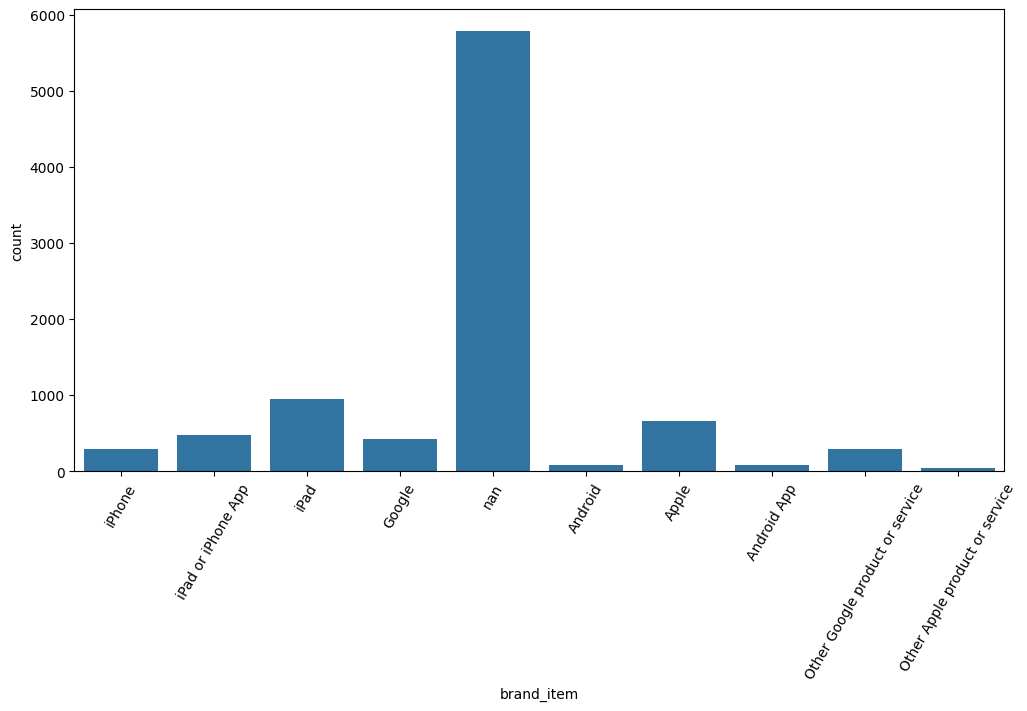

In [9]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='brand_item', data=data)
plt.xticks(rotation=60);

<ipython-input-10-b8a2e7476793>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='brand_name', data=data,


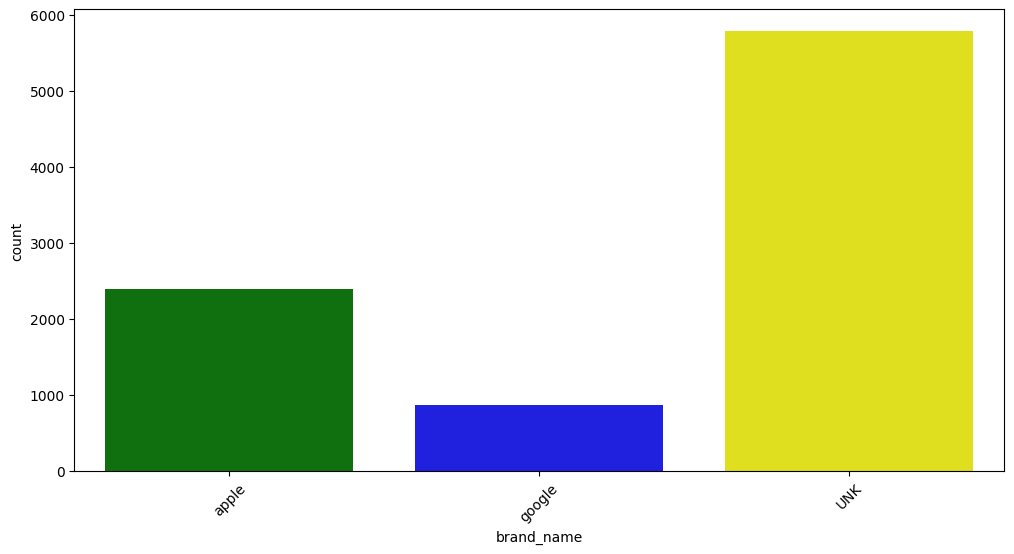

In [10]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='brand_name', data=data,
              palette=['green', 'blue', 'yellow'])
plt.xticks(rotation=45);

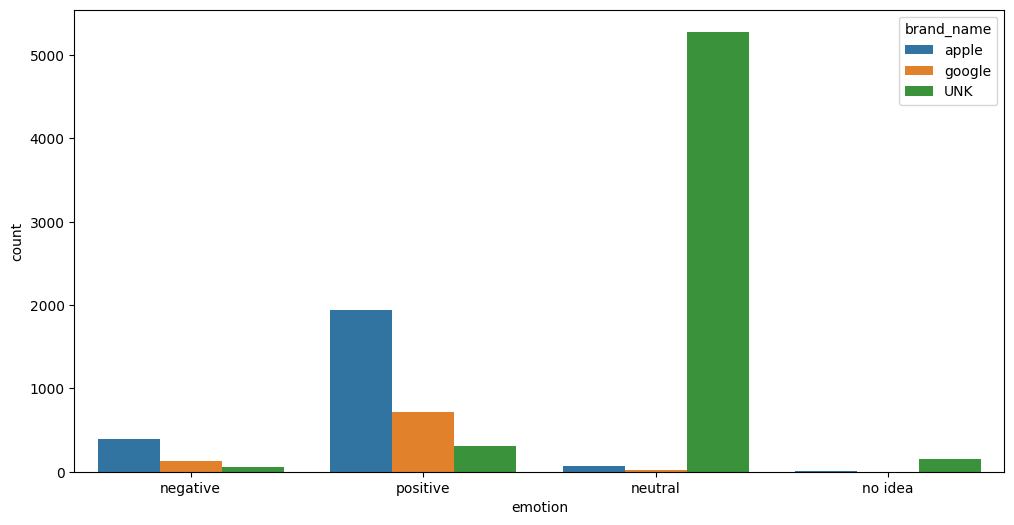

In [11]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=data, x = 'emotion', hue='brand_name')


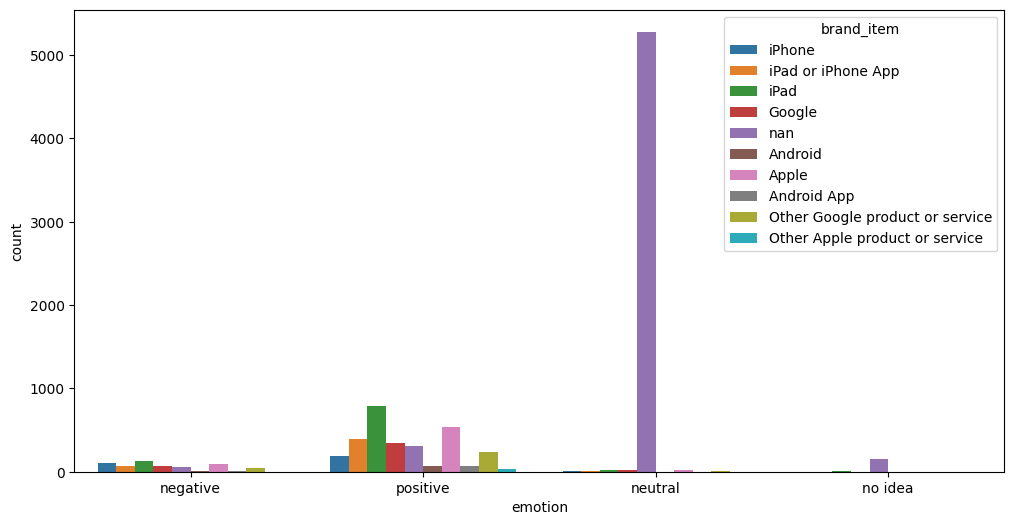

In [12]:
plt.figure(figsize=(12,6))
ay = sns.countplot(data=data, x = 'emotion', hue='brand_item')

In [13]:
df = data[['emotion', 'tweet_text']]
df.head()

,emotion,tweet_text
0,negative,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,positive,@jessedee Know about @fludapp ? Awesome iPad/i...
2,positive,@swonderlin Can not wait for #iPad 2 also. The...
3,negative,@sxsw I hope this year's festival isn't as cra...
4,positive,@sxtxstate great stuff on Fri #SXSW: Marissa M...


In [14]:
df.tweet_text.head()

0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: tweet_text, dtype: object

Data Preprocessing

In [16]:
#importing string library
import string

#function to remove punctuations
def remove_punctuation(text):
  punctuationfree=' '
  punctuationfree="".join([i for i in text if i not in string.punctuation])
  return punctuationfree

#adding punctuationfree column to the dataset
df['clean_tweet']=df['tweet_text'].apply(lambda x:remove_punctuation(x))

<ipython-input-16-2cf3a8e91a77>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_tweet']=df['tweet_text'].apply(lambda x:remove_punctuation(x))


In [17]:
df.head()

,emotion,tweet_text,clean_tweet
0,negative,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,wesley83 I have a 3G iPhone After 3 hrs tweeti...
1,positive,@jessedee Know about @fludapp ? Awesome iPad/i...,jessedee Know about fludapp Awesome iPadiPhon...
2,positive,@swonderlin Can not wait for #iPad 2 also. The...,swonderlin Can not wait for iPad 2 also They s...
3,negative,@sxsw I hope this year's festival isn't as cra...,sxsw I hope this years festival isnt as crashy...
4,positive,@sxtxstate great stuff on Fri #SXSW: Marissa M...,sxtxstate great stuff on Fri SXSW Marissa Maye...


In [18]:
#word tokenization function

import nltk
nltk.download('punkt')
def tokenization(text):
  tokens=nltk.word_tokenize(text)
  return tokens
#adding tokenized column to dataset
df['tokenized_tweet']=df['clean_tweet'].apply(lambda x:tokenization(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
#viewing dataset
df.head()

,emotion,tweet_text,clean_tweet,tokenized_tweet
0,negative,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,wesley83 I have a 3G iPhone After 3 hrs tweeti...,"[wesley83, I, have, a, 3G, iPhone, After, 3, h..."
1,positive,@jessedee Know about @fludapp ? Awesome iPad/i...,jessedee Know about fludapp Awesome iPadiPhon...,"[jessedee, Know, about, fludapp, Awesome, iPad..."
2,positive,@swonderlin Can not wait for #iPad 2 also. The...,swonderlin Can not wait for iPad 2 also They s...,"[swonderlin, Can, not, wait, for, iPad, 2, als..."
3,negative,@sxsw I hope this year's festival isn't as cra...,sxsw I hope this years festival isnt as crashy...,"[sxsw, I, hope, this, years, festival, isnt, a..."
4,positive,@sxtxstate great stuff on Fri #SXSW: Marissa M...,sxtxstate great stuff on Fri SXSW Marissa Maye...,"[sxtxstate, great, stuff, on, Fri, SXSW, Maris..."


In [20]:
#function to remove stopwords
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
  output= [i for i in text if i not in stopwords]
  return output
#adding stopwords removed column to dataset
df['remove_stopwords']=df['tokenized_tweet'].apply(lambda x:remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
df.head()

,emotion,tweet_text,clean_tweet,tokenized_tweet,remove_stopwords
0,negative,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,wesley83 I have a 3G iPhone After 3 hrs tweeti...,"[wesley83, I, have, a, 3G, iPhone, After, 3, h...","[wesley83, I, 3G, iPhone, After, 3, hrs, tweet..."
1,positive,@jessedee Know about @fludapp ? Awesome iPad/i...,jessedee Know about fludapp Awesome iPadiPhon...,"[jessedee, Know, about, fludapp, Awesome, iPad...","[jessedee, Know, fludapp, Awesome, iPadiPhone,..."
2,positive,@swonderlin Can not wait for #iPad 2 also. The...,swonderlin Can not wait for iPad 2 also They s...,"[swonderlin, Can, not, wait, for, iPad, 2, als...","[swonderlin, Can, wait, iPad, 2, also, They, s..."
3,negative,@sxsw I hope this year's festival isn't as cra...,sxsw I hope this years festival isnt as crashy...,"[sxsw, I, hope, this, years, festival, isnt, a...","[sxsw, I, hope, years, festival, isnt, crashy,..."
4,positive,@sxtxstate great stuff on Fri #SXSW: Marissa M...,sxtxstate great stuff on Fri SXSW Marissa Maye...,"[sxtxstate, great, stuff, on, Fri, SXSW, Maris...","[sxtxstate, great, stuff, Fri, SXSW, Marissa, ..."


In [22]:
#function for lemmatization
from nltk.stem import WordNetLemmatizer # Capitalize 'W' in 'WordNetLemmatizer'
nltk.download('wordnet')
wordnet_lemmatizer=WordNetLemmatizer()
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
#adding lemmatized column to dataset
df['lemmatized_tweet']=df['remove_stopwords'].apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [23]:
df.head()

,emotion,tweet_text,clean_tweet,tokenized_tweet,remove_stopwords,lemmatized_tweet
0,negative,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,wesley83 I have a 3G iPhone After 3 hrs tweeti...,"[wesley83, I, have, a, 3G, iPhone, After, 3, h...","[wesley83, I, 3G, iPhone, After, 3, hrs, tweet...","[wesley83, I, 3G, iPhone, After, 3, hr, tweeti..."
1,positive,@jessedee Know about @fludapp ? Awesome iPad/i...,jessedee Know about fludapp Awesome iPadiPhon...,"[jessedee, Know, about, fludapp, Awesome, iPad...","[jessedee, Know, fludapp, Awesome, iPadiPhone,...","[jessedee, Know, fludapp, Awesome, iPadiPhone,..."
2,positive,@swonderlin Can not wait for #iPad 2 also. The...,swonderlin Can not wait for iPad 2 also They s...,"[swonderlin, Can, not, wait, for, iPad, 2, als...","[swonderlin, Can, wait, iPad, 2, also, They, s...","[swonderlin, Can, wait, iPad, 2, also, They, s..."
3,negative,@sxsw I hope this year's festival isn't as cra...,sxsw I hope this years festival isnt as crashy...,"[sxsw, I, hope, this, years, festival, isnt, a...","[sxsw, I, hope, years, festival, isnt, crashy,...","[sxsw, I, hope, year, festival, isnt, crashy, ..."
4,positive,@sxtxstate great stuff on Fri #SXSW: Marissa M...,sxtxstate great stuff on Fri SXSW Marissa Maye...,"[sxtxstate, great, stuff, on, Fri, SXSW, Maris...","[sxtxstate, great, stuff, Fri, SXSW, Marissa, ...","[sxtxstate, great, stuff, Fri, SXSW, Marissa, ..."


In [24]:
#vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,2))
#splitting data as x and y

# Join the lemmatized tokens back into strings
df['final_string'] = df['lemmatized_tweet'].apply(' '.join)

X = df['final_string']
y = pd.get_dummies(df['emotion'])



In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [28]:
from tensorflow.keras.preprocessing import sequence
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'X_train' is your training data as a Pandas Series
cv = CountVectorizer(ngram_range=(1,2))
X_train_vec = cv.fit_transform(X_train)  # Convert text to numerical vectors
X_test_vec = cv.transform(X_test)  # Convert text to numerical vectors

# Now you can pad the sequences
X_train_padded = sequence.pad_sequences(X_train_vec.toarray(), maxlen=300)
X_test_padded = sequence.pad_sequences(X_test_vec.toarray(), maxlen=300)


In [29]:
X_train_padded.shape

(7252, 300)

In [30]:
y_train

,negative,neutral,no idea,positive
416,False,True,False,False
3049,False,True,False,False
8330,False,True,False,False
5959,False,False,False,True
7458,False,True,False,False
...,...,...,...,...
5746,False,False,False,True
5201,False,True,False,False
5402,False,True,False,False
863,False,True,False,False


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN

SimpleRNN

In [32]:
#build the model
model= Sequential()
model.add(Embedding(input_dim=20000,output_dim=150,input_length=300))
model.add(SimpleRNN(128,dropout=0.2))
model.add(Dense(4, activation='softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 150)          3000000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               35712     
                                                                 
 dense (Dense)               (None, 4)                 516       
                                                                 
Total params: 3036228 (11.58 MB)
Trainable params: 3036228 (11.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
#compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
# Now fit the model with the encoded labels, adjusting the final Dense layer to match the number of classes
model = Sequential()
model.add(Embedding(input_dim=1000,output_dim=150,input_length=300))
model.add(SimpleRNN(128,dropout=0.2))
model.add(Dense(4, activation='softmax')) # Set number of units to match number of classes
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [36]:
#train the model
model.fit(X_train_padded,y_train,epochs=4,batch_size=256)

Epoch 1/4
29/29 [==============================] - 13s 339ms/step - loss: 0.9790 - accuracy: 0.5723
Epoch 2/4
29/29 [==============================] - 8s 276ms/step - loss: 0.9260 - accuracy: 0.5911
Epoch 3/4
29/29 [==============================] - 10s 331ms/step - loss: 0.9262 - accuracy: 0.5911
Epoch 4/4
29/29 [==============================] - 10s 331ms/step - loss: 0.9235 - accuracy: 0.5911


In [37]:
#evaluate the model
model.evaluate(X_test_padded,y_test)

57/57 [==============================] - 2s 25ms/step - loss: 0.9162 - accuracy: 0.5985


[0.9161894917488098, 0.5984556078910828]

LSTM

In [40]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras import layers

In [41]:
#BUILD THE MODEL
model2= Sequential()
model2.add(Embedding(input_dim=1000,output_dim=150,input_length=300))
model2.add(layers.GlobalMaxPool1D())
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(64, activation='relu'))
model2.add(Dense(4, activation='softmax'))

In [42]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 150)          150000    
                                                                 
 global_max_pooling1d (Glob  (None, 150)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                9664      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 159924 (624.70 KB)
Trainable params: 159924 (624.70 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [43]:
#COMPILE THE MODEL
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
model2.fit(X_train_padded,y_train,epochs=4,batch_size=256)

Epoch 1/4
29/29 [==============================] - 1s 11ms/step - loss: 1.1634 - accuracy: 0.5863
Epoch 2/4
29/29 [==============================] - 0s 7ms/step - loss: 0.9422 - accuracy: 0.5911
Epoch 3/4
29/29 [==============================] - 0s 6ms/step - loss: 0.9232 - accuracy: 0.5911
Epoch 4/4
29/29 [==============================] - 0s 6ms/step - loss: 0.9224 - accuracy: 0.5911


In [45]:
#evaluate the model
model2.evaluate(X_test_padded,y_test)

57/57 [==============================] - 0s 2ms/step - loss: 0.9135 - accuracy: 0.5985


[0.9134570360183716, 0.5984556078910828]